# Progetto per l'esame di Analisi di Dati (A.A. 2020/21)

### A cura di Erica Cau, Simona Mazzarino, Federico Mazzoni

### Importazione librerie e file

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from collections import Counter
from matplotlib.pyplot import figure

pd.options.display.max_columns = 100

In [2]:
match = pd.read_csv('matches.csv')
ball = pd.read_csv('deliveries.csv')

#### Si effettua una merge dei dataset usando come chiave il match id

In [3]:
df = pd.merge(ball, match, left_on="match_id", right_on="id")
df

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150455,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,2,Sachin Baby,CJ Jordan,B Kumar,0,0,0,0,0,0,2,0,2,NaN,NaN,NaN,636,2016,Bangalore,2016-05-29,Sunrisers Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,8,0,BCJ Cutting,M Chinnaswamy Stadium,HDPK Dharmasena,BNJ Oxenford,NaN
150456,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,3,Sachin Baby,CJ Jordan,B Kumar,0,0,0,0,0,0,0,0,0,CJ Jordan,run out,NV Ojha,636,2016,Bangalore,2016-05-29,Sunrisers Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,8,0,BCJ Cutting,M Chinnaswamy Stadium,HDPK Dharmasena,BNJ Oxenford,NaN
150457,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,4,Iqbal Abdulla,Sachin Baby,B Kumar,0,0,0,1,0,0,0,1,1,NaN,NaN,NaN,636,2016,Bangalore,2016-05-29,Sunrisers Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,8,0,BCJ Cutting,M Chinnaswamy Stadium,HDPK Dharmasena,BNJ Oxenford,NaN
150458,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,5,Sachin Baby,Iqbal Abdulla,B Kumar,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN,636,2016,Bangalore,2016-05-29,Sunrisers Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,8,0,BCJ Cutting,M Chinnaswamy Stadium,HDPK Dharmasena,BNJ Oxenford,NaN


### Visualizzazione dei dataset

In [4]:
match.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [5]:
match.tail()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
631,632,2016,Raipur,2016-05-22,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,6,V Kohli,Shaheed Veer Narayan Singh International Stadium,A Nand Kishore,BNJ Oxenford,NaN
632,633,2016,Bangalore,2016-05-24,Gujarat Lions,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,4,AB de Villiers,M Chinnaswamy Stadium,AK Chaudhary,HDPK Dharmasena,NaN
633,634,2016,Delhi,2016-05-25,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Sunrisers Hyderabad,22,0,MC Henriques,Feroz Shah Kotla,M Erasmus,C Shamshuddin,NaN
634,635,2016,Delhi,2016-05-27,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,4,DA Warner,Feroz Shah Kotla,M Erasmus,CK Nandan,NaN
635,636,2016,Bangalore,2016-05-29,Sunrisers Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,8,0,BCJ Cutting,M Chinnaswamy Stadium,HDPK Dharmasena,BNJ Oxenford,NaN


In [6]:
ball.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


In [7]:
ball.tail()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
150455,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,2,Sachin Baby,CJ Jordan,B Kumar,0,0,0,0,0,0,2,0,2,NaN,NaN,NaN
150456,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,3,Sachin Baby,CJ Jordan,B Kumar,0,0,0,0,0,0,0,0,0,CJ Jordan,run out,NV Ojha
150457,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,4,Iqbal Abdulla,Sachin Baby,B Kumar,0,0,0,1,0,0,0,1,1,NaN,NaN,NaN
150458,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,5,Sachin Baby,Iqbal Abdulla,B Kumar,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
150459,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,6,Iqbal Abdulla,Sachin Baby,B Kumar,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN


### Visualizzazione delle informazioni di base

#### Osservazione dei missing values e dei datatype di ciascuna variabile

In [8]:
match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               636 non-null    int64  
 1   season           636 non-null    int64  
 2   city             629 non-null    object 
 3   date             636 non-null    object 
 4   team1            636 non-null    object 
 5   team2            636 non-null    object 
 6   toss_winner      636 non-null    object 
 7   toss_decision    636 non-null    object 
 8   result           636 non-null    object 
 9   dl_applied       636 non-null    int64  
 10  winner           633 non-null    object 
 11  win_by_runs      636 non-null    int64  
 12  win_by_wickets   636 non-null    int64  
 13  player_of_match  633 non-null    object 
 14  venue            636 non-null    object 
 15  umpire1          635 non-null    object 
 16  umpire2          635 non-null    object 
 17  umpire3         

In [9]:
ball.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150460 entries, 0 to 150459
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          150460 non-null  int64 
 1   inning            150460 non-null  int64 
 2   batting_team      150460 non-null  object
 3   bowling_team      150460 non-null  object
 4   over              150460 non-null  int64 
 5   ball              150460 non-null  int64 
 6   batsman           150460 non-null  object
 7   non_striker       150460 non-null  object
 8   bowler            150460 non-null  object
 9   is_super_over     150460 non-null  int64 
 10  wide_runs         150460 non-null  int64 
 11  bye_runs          150460 non-null  int64 
 12  legbye_runs       150460 non-null  int64 
 13  noball_runs       150460 non-null  int64 
 14  penalty_runs      150460 non-null  int64 
 15  batsman_runs      150460 non-null  int64 
 16  extra_runs        150460 non-null  int

#### Visualizzazione delle informazioni statistiche di base con il metodo .describe() di Pandas
    
    Per le variabili numeriche si visualizza: 
        * Count
        * Media
        * Deviazione standard
        * Minimo e massimo
        * Percentili
        
    Per le variabili categoriche: 
        * count
        * Numero di valori unici
        * Valore più comune (top)
        * Frequenza del valore più comune (Freq)

In [10]:
print("Statistiche di base delle features numeriche dataset \"match\" \n")
match.describe()

Statistiche di base delle features numeriche dataset "match" 



,id,season,dl_applied,win_by_runs,win_by_wickets,umpire3
count,636.000000,636.000000,636.000000,636.000000,636.000000,0.0
mean,318.500000,2012.490566,0.025157,13.682390,3.372642,NaN
std,183.741666,2.773026,0.156726,23.908877,3.420338,NaN
min,1.000000,2008.000000,0.000000,0.000000,0.000000,NaN
25%,159.750000,2010.000000,0.000000,0.000000,0.000000,NaN
50%,318.500000,2012.000000,0.000000,0.000000,4.000000,NaN
75%,477.250000,2015.000000,0.000000,20.000000,7.000000,NaN
max,636.000000,2017.000000,1.000000,146.000000,10.000000,NaN


In [11]:
print("Statistiche di base delle features categoriche dataset \"match\" \n")
match.describe(include=[np.object])

Statistiche di base delle features categoriche dataset "match" 



,city,date,team1,team2,toss_winner,toss_decision,result,winner,player_of_match,venue,umpire1,umpire2
count,629,636,636,636,636,636,636,633,633,636,635,635
unique,30,450,14,14,14,2,3,14,201,35,44,45
top,Mumbai,2015-04-25,Mumbai Indians,Delhi Daredevils,Mumbai Indians,field,normal,Mumbai Indians,CH Gayle,M Chinnaswamy Stadium,HDPK Dharmasena,SJA Taufel
freq,85,2,82,84,85,363,626,92,18,66,73,54


In [12]:
print("Statistiche di base delle features numeriche del dataset \"ball\" \n")
ball.describe()


Statistiche di base delle features numeriche del dataset "ball" 



,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000
mean,318.281317,1.482188,10.142649,3.616483,0.000538,0.037498,0.004885,0.022232,0.004340,0.000066,1.222445,0.069022,1.291466
std,182.955531,0.501768,5.674338,1.807698,0.023196,0.257398,0.114234,0.200104,0.072652,0.018229,1.594509,0.349667,1.583240
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,161.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,319.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,476.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,636.000000,4.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,6.000000,7.000000,7.000000


In [13]:
print("Statistiche di base delle features categoriche dataset \"ball\" \n")
ball.describe(include=[np.object])

Statistiche di base delle features categoriche dataset "ball" 



,batting_team,bowling_team,batsman,non_striker,bowler,player_dismissed,dismissal_kind,fielder
count,150460,150460,150460,150460,150460,7438,7438,5369
unique,14,14,461,458,356,436,9,451
top,Mumbai Indians,Mumbai Indians,V Kohli,G Gambhir,Harbhajan Singh,SK Raina,caught,KD Karthik
freq,18943,18879,3494,3635,2989,134,4373,127


### Visualizzazione dell'andamento della distribuzione di alcune variabili

#### KDE della variabile Win By Runs

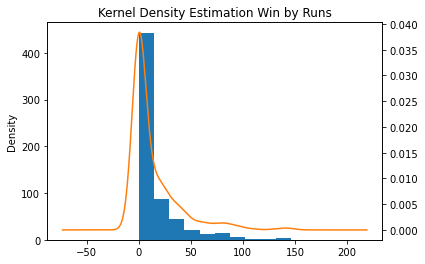

In [14]:
ax = match["win_by_runs"].plot(kind = "hist")
match["win_by_runs"].plot(kind = "kde", ax = ax, secondary_y=True)
plt.title("Kernel Density Estimation Win by Runs")
plt.savefig("KDE_win_by_runs")

#### Dato che la distribuzione non è normale, andiamo ad osservare l'indice di Kurtosis e, successivamente, l'asimmetria

In [15]:
print("\nCurtosi win by runs: ", match["win_by_runs"].kurt())
print("Skew win by runs: ", match["win_by_runs"].skew())


Curtosi win by runs:  7.458171119563962
Skew win by runs:  2.5220633095183893


#### KDE della variabile Win by Wickets

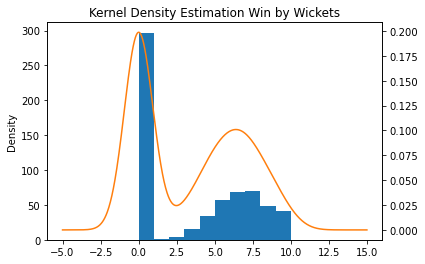

In [16]:
ax = match["win_by_wickets"].plot(kind = "hist")
match["win_by_wickets"].plot(kind = "kde", ax = ax, secondary_y=True)
plt.title("Kernel Density Estimation Win by Wickets")
plt.savefig("KDE_win_by_wickets")

#### Anche in questo caso si calcolano la Kurtosis e l'asimmetria

In [17]:
print("Curtosi win_by_wickets: ", match["win_by_wickets"].kurt())
print("Skew win_by_wickets: ", match["win_by_wickets"].skew())

Curtosi win_by_wickets:  -1.5317292793264188
Skew win_by_wickets:  0.26765600245962706


##### Media, mediana, standard deviation e percentili del numero di partite vinte per ogni squadra

In [18]:
match["winner"].value_counts().describe()

count    14.000000
mean     45.214286
std      31.785770
min       5.000000
25%      12.250000
50%      52.000000
75%      72.250000
max      92.000000
Name: winner, dtype: float64

#### KDE della variabile Winner

<AxesSubplot:label='bb2944f1-a3d9-4a92-a281-7dc46127f955'>

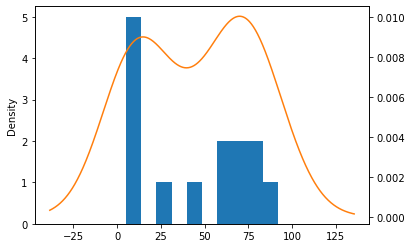

In [19]:
ax = match["winner"].value_counts().plot(kind = "hist")
match["winner"].value_counts().plot(kind = "kde", ax = ax, secondary_y=True)

##### Media, mediana, standard deviation e percentili del numero di partite vinte per ogni squadra

In [20]:
match["season"].value_counts().describe()

count    10.000000
mean     63.600000
std       7.501111
min      57.000000
25%      59.000000
50%      60.000000
75%      69.750000
max      76.000000
Name: season, dtype: float64

#### KDE della variabile Season

<AxesSubplot:label='b76a461a-5645-45cd-bf7b-6bbb6145dfcd'>

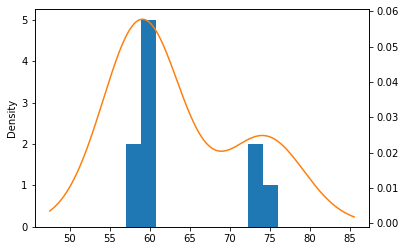

In [21]:
ax = match["season"].value_counts().plot(kind = "hist")
match["season"].value_counts().plot(kind = "kde", ax = ax, secondary_y=True)

##### Media, mediana, standard deviation e percentili del numero di volte in cui un giocatore è il player of match

In [22]:
match["player_of_match"].value_counts().describe()

count    201.000000
mean       3.149254
std        3.371589
min        1.000000
25%        1.000000
50%        2.000000
75%        4.000000
max       18.000000
Name: player_of_match, dtype: float64

#### KDE della variabile Player of Match

<AxesSubplot:label='adbdee5c-ad59-4194-bb48-6f3b752bd04d'>

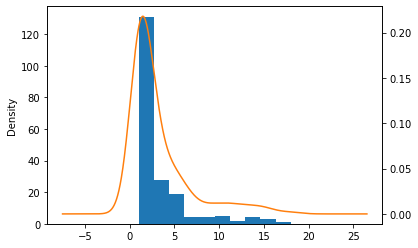

In [23]:
ax = match["player_of_match"].value_counts().plot(kind = "hist")
match["player_of_match"].value_counts().plot(kind = "kde", ax = ax, secondary_y=True)

In [24]:
print('Kurtosis:', match["player_of_match"].value_counts().kurt())
print('Skewness:', match["player_of_match"].value_counts().skew())

Kurtosis: 4.825955843506951
Skewness: 2.2344300685036664


##### Media, mediana, standard deviation e percentili del numero di volte in cui un giocatore è batsman

In [25]:
ball['batsman'].value_counts().describe()

count     461.00000
mean      326.37744
std       617.31306
min         1.00000
25%        18.00000
50%        71.00000
75%       285.00000
max      3494.00000
Name: batsman, dtype: float64

#### KDE della variabile Batsman

<AxesSubplot:label='302fc299-548c-46b0-b494-fa6a3a59d30c'>

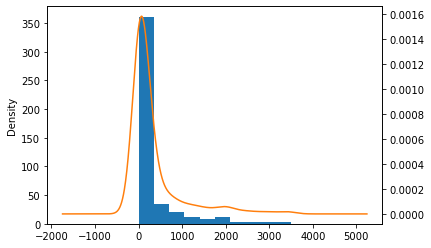

In [26]:
ax = ball["batsman"].value_counts().plot(kind = "hist")
ball["batsman"].value_counts().plot(kind = "kde", ax = ax, secondary_y=True)

In [27]:
print('Kurtosis:', ball["batsman"].value_counts().kurt())
print('Skewness:', ball["batsman"].value_counts().skew())

Kurtosis: 8.516702402820052
Skewness: 2.87288447833879


## Fase di data cleaning

#### Si cancella la variabile umpire3 in quanto mancante di quasi tutti i valori

In [28]:
del match ['umpire3']

#### Rimozione delle righe con missing values

In [29]:
match.dropna(inplace=True)

#### Si osserva il risultato con il metodo .info()

In [30]:
match.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 625 entries, 0 to 635
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               625 non-null    int64 
 1   season           625 non-null    int64 
 2   city             625 non-null    object
 3   date             625 non-null    object
 4   team1            625 non-null    object
 5   team2            625 non-null    object
 6   toss_winner      625 non-null    object
 7   toss_decision    625 non-null    object
 8   result           625 non-null    object
 9   dl_applied       625 non-null    int64 
 10  winner           625 non-null    object
 11  win_by_runs      625 non-null    int64 
 12  win_by_wickets   625 non-null    int64 
 13  player_of_match  625 non-null    object
 14  venue            625 non-null    object
 15  umpire1          625 non-null    object
 16  umpire2          625 non-null    object
dtypes: int64(5), object(12)
memory usag

In [31]:
ball.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150460 entries, 0 to 150459
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          150460 non-null  int64 
 1   inning            150460 non-null  int64 
 2   batting_team      150460 non-null  object
 3   bowling_team      150460 non-null  object
 4   over              150460 non-null  int64 
 5   ball              150460 non-null  int64 
 6   batsman           150460 non-null  object
 7   non_striker       150460 non-null  object
 8   bowler            150460 non-null  object
 9   is_super_over     150460 non-null  int64 
 10  wide_runs         150460 non-null  int64 
 11  bye_runs          150460 non-null  int64 
 12  legbye_runs       150460 non-null  int64 
 13  noball_runs       150460 non-null  int64 
 14  penalty_runs      150460 non-null  int64 
 15  batsman_runs      150460 non-null  int64 
 16  extra_runs        150460 non-null  int

# Fase di data exploration

## Analisi delle partite

### Partite vinte per squadra

#### Bar plot

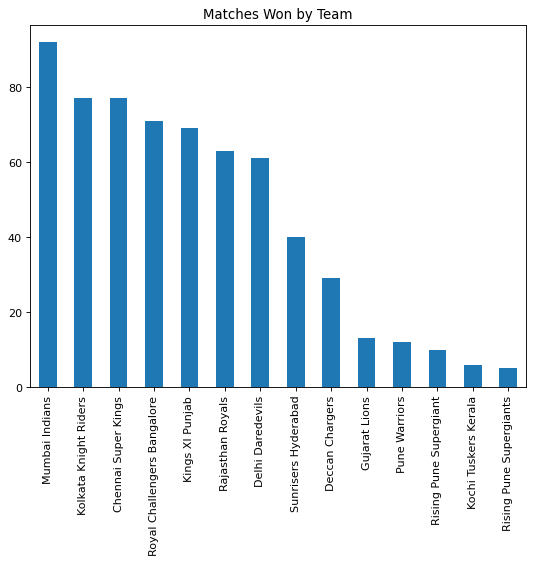

<Figure size 432x288 with 0 Axes>

In [32]:
figure(figsize=(8, 6), dpi=80)

match['winner'].value_counts().plot(kind='bar', title='Matches Won by Team', )
plt.show()
plt.savefig("Matches Won by Team.jpg" )

#### Pie chart

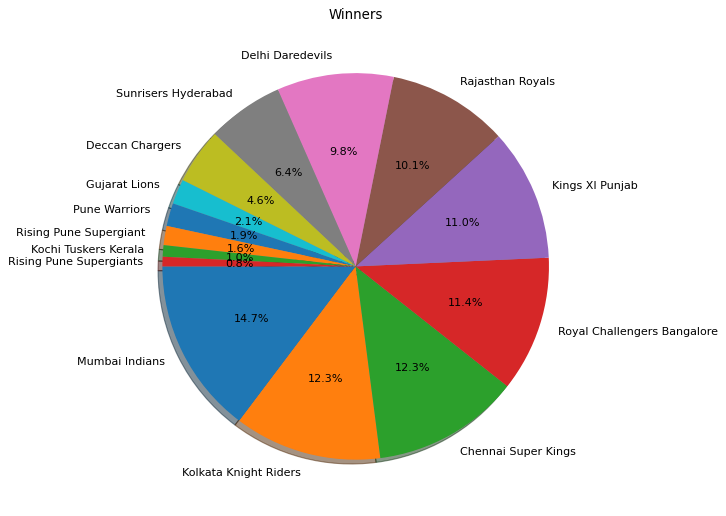

In [33]:
figure(figsize=(10, 8), dpi=80)

labels = match['winner'].value_counts().index.tolist()
sizes = match['winner'].value_counts()

plt.pie(sizes, labels = labels, autopct = '%1.1f%%', shadow = True, startangle = 180)
plt.title('Winners')
plt.show()

### Partite vinte per team in ogni stagione

#### Stacked bar chart

In [34]:
partite_squadra = df.groupby(["season", "winner"])["match_id"].nunique()

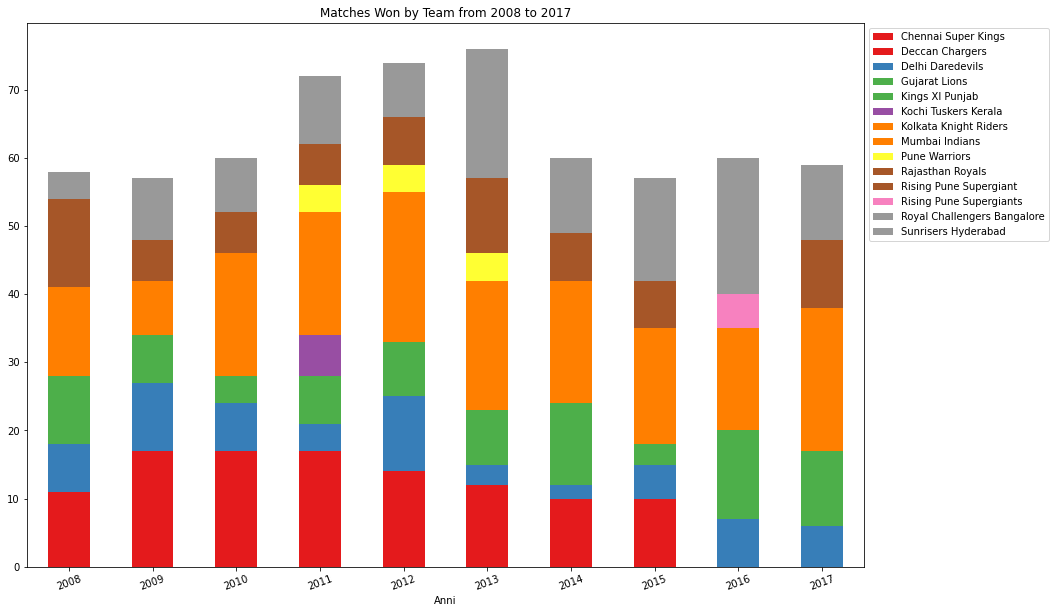

<Figure size 432x288 with 0 Axes>

In [35]:
partite_squadra.unstack().plot(kind='bar', stacked=True, cmap = "Set1", figsize=(15,10)) 
plt.title("Matches Won by Team from 2008 to 2017")
plt.xlabel("Anni")
plt.xticks(rotation = 20)
plt.legend(bbox_to_anchor= [1,1])
plt.show()
plt.savefig("Matches Won by Team from 2008 to 2017")

## Partite giocate

### Partite giocate per città

#### Bar chart

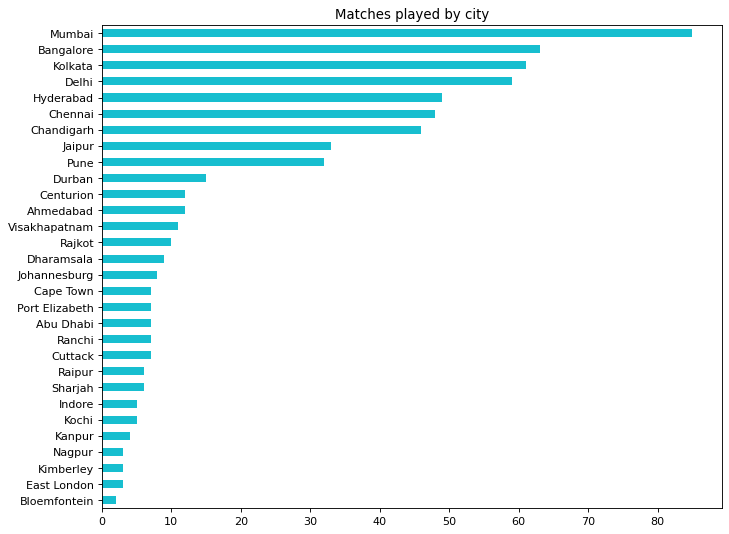

<Figure size 432x288 with 0 Axes>

In [36]:
figure(figsize=(10, 8), dpi=80)

match['city'].value_counts().sort_values(ascending = True).plot(kind='barh', title='Matches played by city', color = 'tab:cyan')
plt.show()
plt.savefig("Matches played by city")

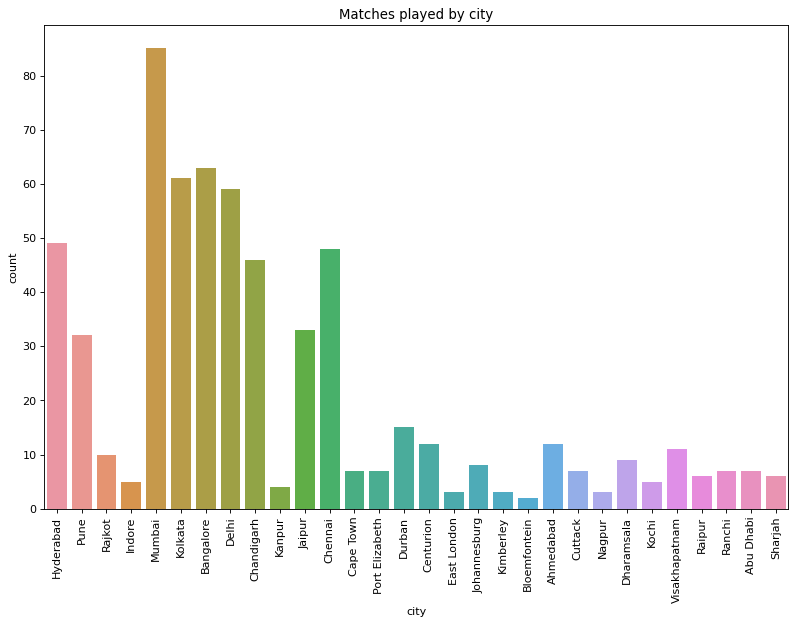

In [37]:
figure(figsize=(12, 8), dpi=80)

sns.countplot(x = 'city', data=match)
plt.xticks(rotation='vertical')
plt.title('Matches played by city')
plt.show()

### Partite giocate per stagione

#### Countplot 

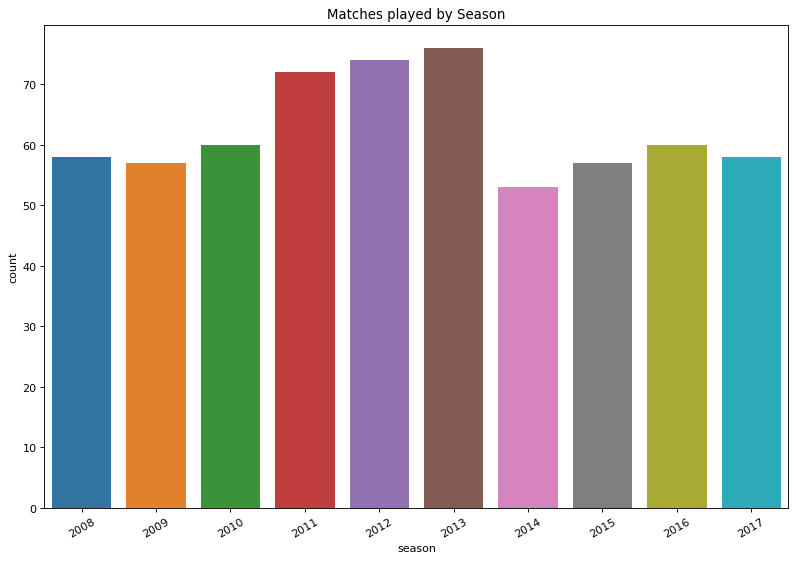

In [38]:
figure(figsize=(12, 8), dpi=80)

sns.countplot(x = 'season', data=match)
plt.xticks(rotation=30)
plt.title("Matches played by Season")
plt.show()

#### Pie chart

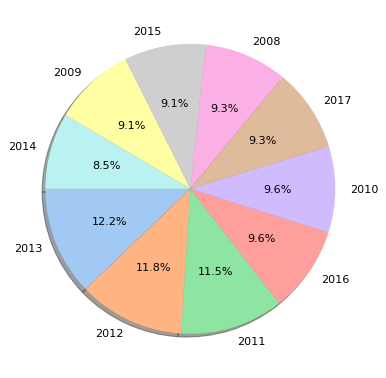

In [39]:
figure(figsize=(8, 6), dpi=80)

labels = match['season'].value_counts().index.tolist()
sizes = match['season'].value_counts()
colors = sns.color_palette('pastel')
plt.pie(sizes, labels = labels, colors = colors, autopct = '%1.1f%%', shadow = True, startangle = 180)
plt.title('')
plt.show()

### Osserviamo se la toss decision influisce sulla vittoria

In [40]:
pclass_xt = pd.crosstab(match['winner'], match['toss_decision'])
pclass_xt

toss_decision,bat,field
winner,,
Chennai Super Kings,49,28
Deccan Chargers,14,15
Delhi Daredevils,27,34
Gujarat Lions,2,11
Kings XI Punjab,20,49
Kochi Tuskers Kerala,0,6
Kolkata Knight Riders,34,43
Mumbai Indians,41,51
Pune Warriors,9,3


#### Trasformiamo i valori in percentuale dividendoli ciascuno per la somma dei valori per ciascun record

In [45]:
pclass_xt_pct = pclass_xt.div(pclass_xt.sum(1).astype(float), axis=0)
pclass_xt_pct

toss_decision,bat,field
winner,,
Chennai Super Kings,0.636364,0.363636
Deccan Chargers,0.482759,0.517241
Delhi Daredevils,0.442623,0.557377
Gujarat Lions,0.153846,0.846154
Kings XI Punjab,0.289855,0.710145
Kochi Tuskers Kerala,0.000000,1.000000
Kolkata Knight Riders,0.441558,0.558442
Mumbai Indians,0.445652,0.554348
Pune Warriors,0.750000,0.250000


#### Bar plot

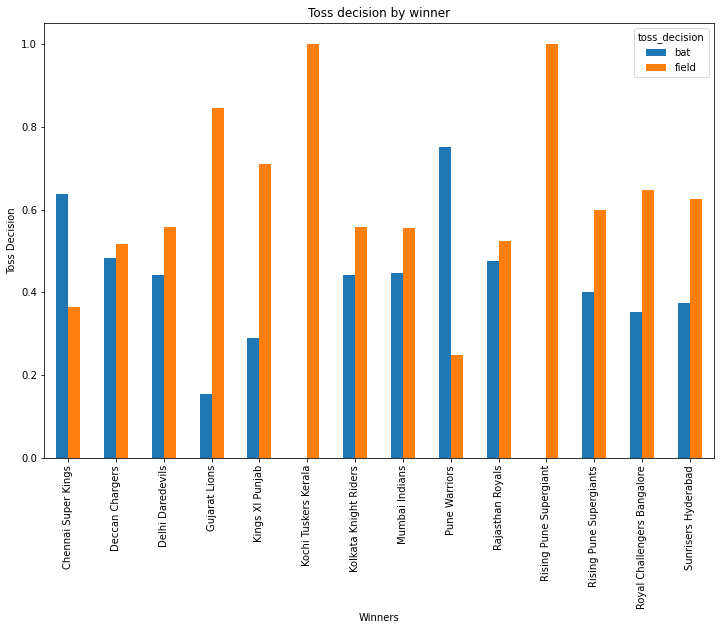

In [42]:
pclass_xt_pct.plot(kind='bar', stacked=False, 
                   title='Toss decision by winner', figsize=(12, 8))
plt.xlabel('Winners')
plt.ylabel('Toss Decision')

plt.show()

### Partite giocate per stadio

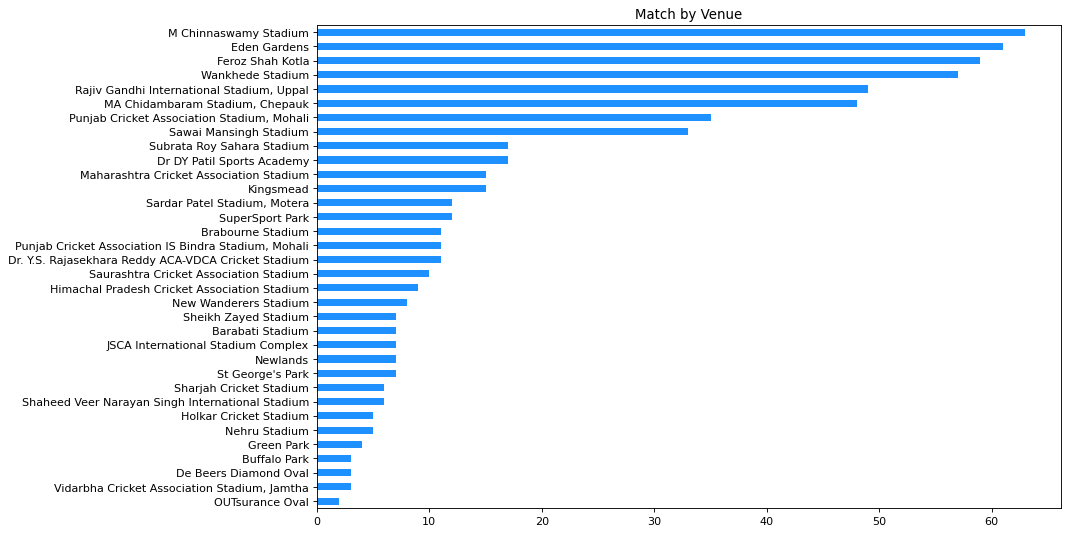

In [43]:
figure(figsize=(12, 8), dpi = 80)
match['venue'].value_counts().sort_values(ascending = True).plot(kind='barh', title='Match by Venue', color = "dodgerblue")
plt.show()

### Partite vinte sulla base delle partite giocate da ogni squadra

Text(0.5, 1.0, 'Won Matches by Played Matches')

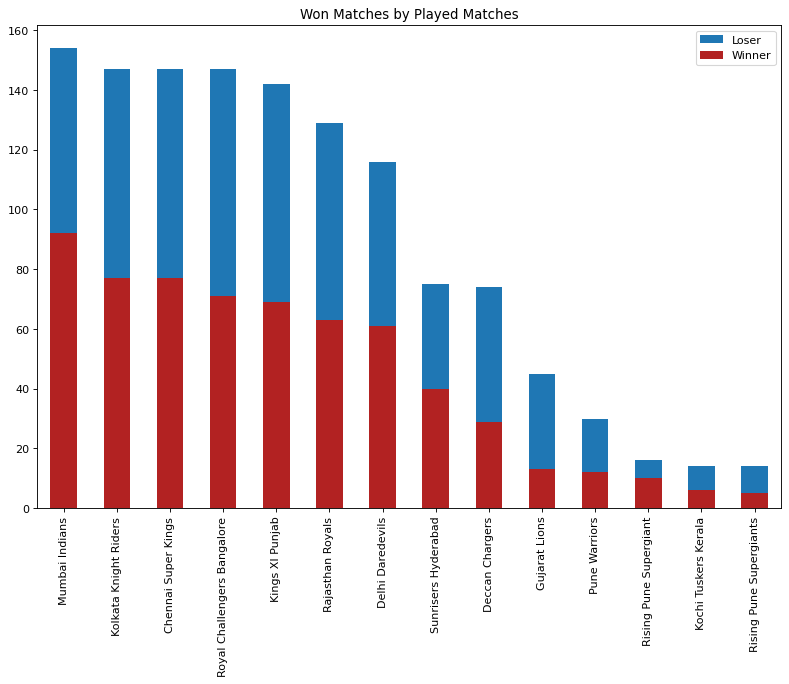

In [44]:
figure(figsize=(12, 8), dpi = 80)
x = match['team1'].value_counts()
y = match['team2'].value_counts()
(x+y).sort_values(ascending = False).plot(kind='bar')
match['winner'].value_counts().plot(kind='bar', color = 'firebrick')
plt.legend(labels = ["Loser", "Winner"])
plt.title('Won Matches by Played Matches')

## Analisi delle cause più comuni di espulsione

In [45]:
count = ball["dismissal_kind"].value_counts().index.tolist()
#rimuovo i casi di squalifica meno frequenti per evitare la sovrapposizione
#delle etichette (0%/3% sul totale)
lista = ['hit wicket','retired hurt', 'obstructing the field']
labels = [x for x in count if x not in lista] 

count_sizes = ball['dismissal_kind'].value_counts()
sizes = count_sizes[0:6]


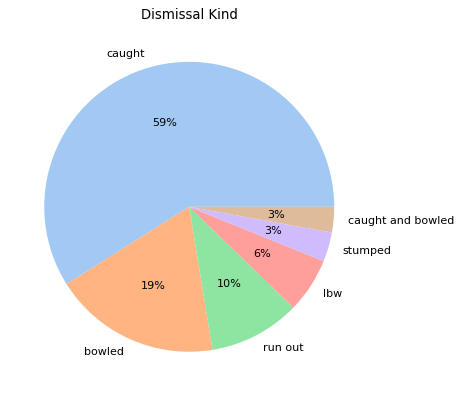

In [46]:
figure(figsize=(8, 6), dpi=80)

colors = sns.color_palette('pastel')[0:6]
plt.title("Dismissal Kind")
plt.pie(sizes, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

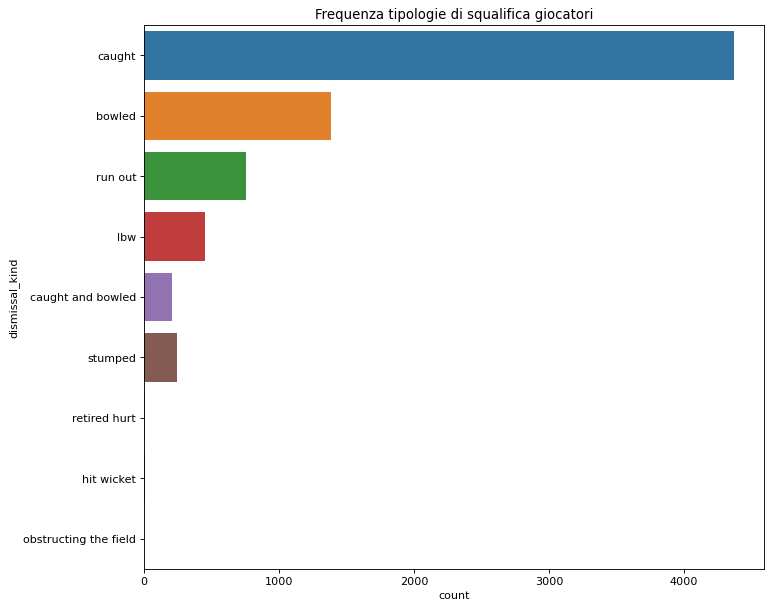

In [47]:
figure(figsize = (10,9), dpi = 80)
sns.countplot(data = ball, y = 'dismissal_kind')
plt.title("Frequenza tipologie di squalifica giocatori")
plt.show()

## Arbitri per match

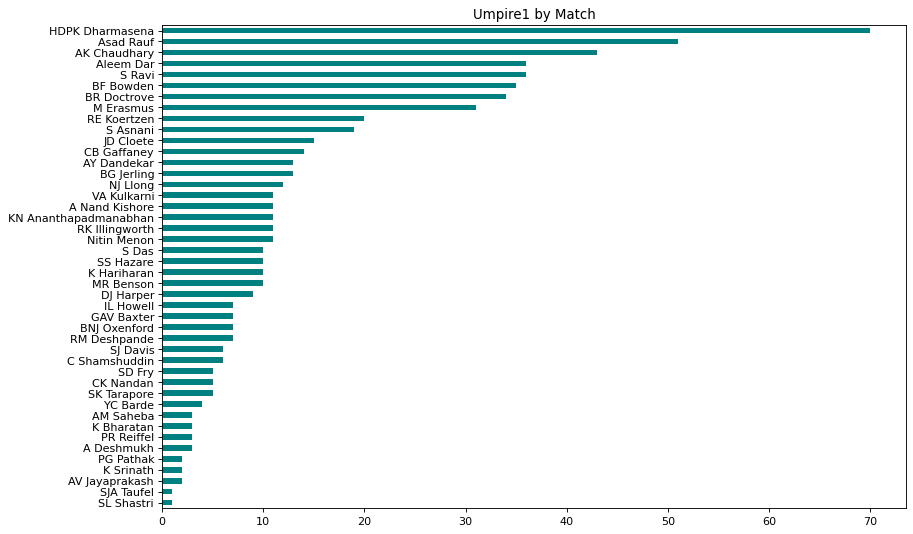

In [48]:
figure(figsize=(12, 8), dpi = 80)
match['umpire1'].value_counts().sort_values(ascending = True).plot(kind='barh', title='Umpire1 by Match', color = "teal")
plt.show()

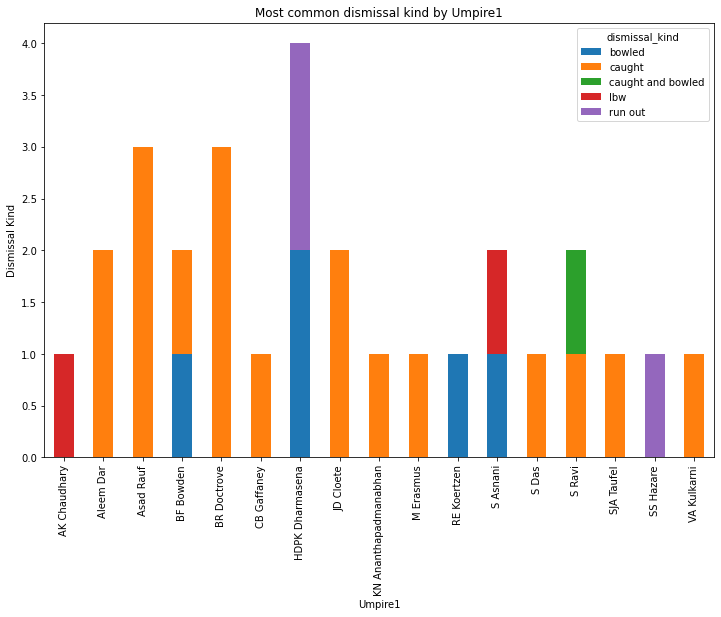

In [49]:
pclass = pd.crosstab(match['umpire1'], ball['dismissal_kind']).plot(kind='bar', stacked=True, 
                   title='Most common dismissal kind by Umpire1', figsize=(12, 8))
#plt.xticks(rotation = 30)
plt.xlabel('Umpire1')
plt.ylabel('Dismissal Kind')
plt.show()

## Analisi battitore migliore

Text(0.5, 1.0, 'Top 5 Batsman')

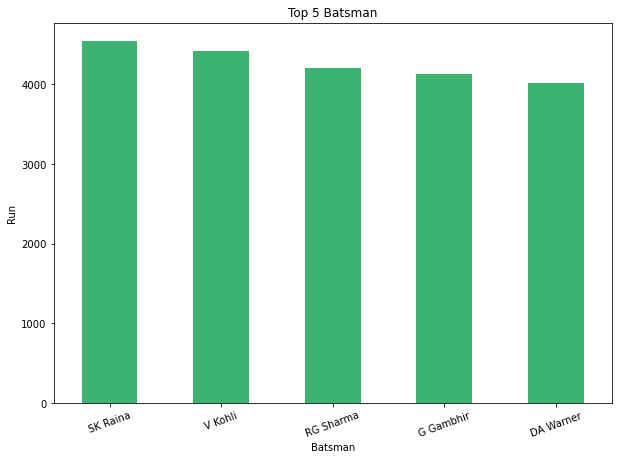

In [50]:
top_batsman= df.groupby('batsman')['batsman_runs'].agg('sum').reset_index().sort_values('batsman_runs', ascending=False).head(5)

top_batsman.set_index('batsman', inplace=True)

ax = top_batsman.plot(kind='bar', color = "mediumseagreen", figsize=(10, 7), legend = None)
plt.xticks(rotation = 20)
ax.set_xlabel("Batsman")
ax.set_ylabel("Run")

plt.title("Top 5 Batsman")

## Analisi sul dataset "ball"

### Dimostriamo lo sbilanciamento della variabile *is_super_over*

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

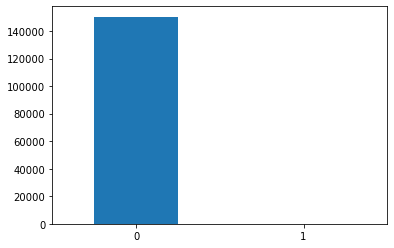

In [51]:
ball["is_super_over"].value_counts().plot(kind = "bar")
plt.xticks(rotation = 0)

In [52]:
count_match = match['season'].value_counts().sort_index()
df_plot = count_match.rename_axis('date').reset_index(name='counts')

## Migliori player dei match

<AxesSubplot:title={'center':'Top 10 Player of the match'}>

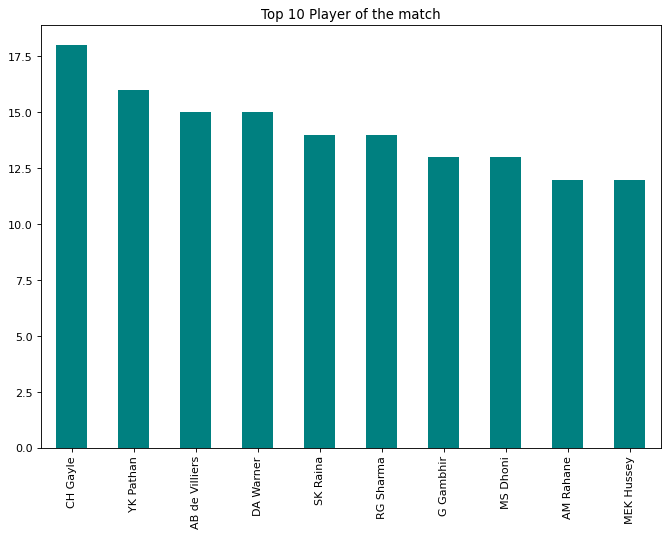

In [53]:
x = match["player_of_match"].value_counts().iloc[:10]
figure(figsize = (10,7), dpi = 80)
plt.title("Top 10 Player of the match")
x.plot(kind = "bar", color = "teal")

# Fase di analisi della correlazione

In [54]:
ball.corr('kendall')

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
match_id,1.000000,0.000920,0.002976,-0.001564,-0.000976,-0.004897,-0.005869,-0.004605,-0.005237,-0.000789,0.006964,-0.009177,0.004316
inning,0.000920,1.000000,-0.041020,-0.003200,0.046400,0.004251,-0.005066,-0.003047,-0.001815,0.003778,-0.008339,-0.000145,-0.008388
over,0.002976,-0.041020,1.000000,-0.007538,-0.031868,-0.013712,0.022428,-0.000437,0.013596,-0.000854,0.108396,-0.001700,0.107047
ball,-0.001564,-0.003200,-0.007538,1.000000,-0.001325,-0.006019,0.008370,-0.006267,0.001968,0.000725,0.009302,-0.005604,0.007632
is_super_over,-0.000976,0.046400,-0.031868,-0.001325,1.000000,-0.000781,0.004261,0.003519,0.016427,-0.000085,0.008095,0.006956,0.009638
wide_runs,-0.004897,0.004251,-0.013712,-0.006019,-0.000781,1.000000,-0.009263,-0.023379,-0.011356,0.010232,-0.180032,0.736022,0.056051
bye_runs,-0.005869,-0.005066,0.022428,0.008370,0.004261,-0.009263,1.000000,-0.006926,-0.003364,-0.000191,-0.053330,0.220201,0.028337
legbye_runs,-0.004605,-0.003047,-0.000437,-0.006267,0.003519,-0.023379,-0.006926,1.000000,-0.008490,-0.000482,-0.134597,0.550865,0.045731
noball_runs,-0.005237,-0.001815,0.013596,0.001968,0.016427,-0.011356,-0.003364,-0.008490,1.000000,-0.000234,-0.000519,0.265429,0.052585
penalty_runs,-0.000789,0.003778,-0.000854,0.000725,-0.000085,0.010232,-0.000191,-0.000482,-0.000234,1.000000,-0.003712,0.016006,0.005957


## Correlation heatmap (Pearson)

Text(0.5, 1.0, 'Correlation Heatmap Ball dataset')

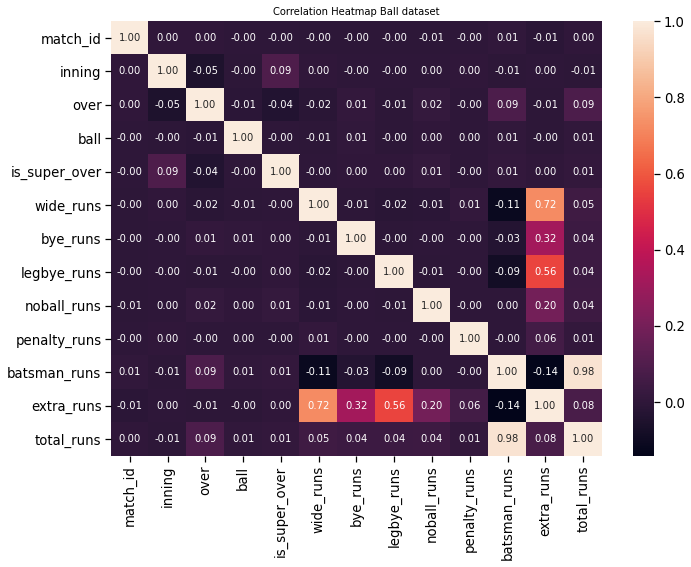

In [55]:
plt.rcParams["figure.figsize"]=[11,8]
sns.set_context("notebook", font_scale=1.2, rc={"font.size":10,"axes.titlesize":10,"axes.labelsize":8})
sns.heatmap (ball.corr(), annot = True, fmt = ".2f")
plt.title("Correlation Heatmap Ball dataset")

##### Visti i problemi nel calcolo della correlazione tra variabili, dovuta alla loro natura In alcuni casi categorica in altri discreta, creiamo un subset con nuove variabili numeriche

## Creazione di nuove features e di un dataset sulle prestazioni dei diversi team

In [56]:
team1 = match['team1'].value_counts().to_frame("team1")
team2 = match['team2'].value_counts().to_frame("team2")

team1['team2'] = team2
team1['played_match'] = team1['team1']+team1['team2']
team1['win'] = match['winner'].value_counts()
team1['loss'] = team1['played_match']-team1['win']
team1['win_rate'] = team1['win'].div(team1['played_match']).round(2)
team1['loss_rate'] = team1['loss'].div(team1['played_match']).round(2)
team1['toss_winning'] = (match['toss_winner'].value_counts())
team1

,team1,team2,played_match,win,loss,win_rate,loss_rate,toss_winning
Mumbai Indians,80,74,154,92,62,0.60,0.40,83
Kings XI Punjab,77,70,147,69,78,0.47,0.53,67
Chennai Super Kings,76,53,129,77,52,0.60,0.40,66
Kolkata Knight Riders,67,80,147,77,70,0.52,0.48,77
Royal Challengers Bangalore,67,80,147,71,76,0.48,0.52,67
Delhi Daredevils,61,81,142,61,81,0.43,0.57,71
Rajasthan Royals,54,62,116,63,53,0.54,0.46,61
Sunrisers Hyderabad,44,30,74,40,34,0.54,0.46,34
Deccan Chargers,43,32,75,29,46,0.39,0.61,43
Pune Warriors,20,25,45,12,33,0.27,0.73,20


#### Ordiniamo il dataset in base al tasso di vittoria (*win_rate*)

In [57]:
team1.sort_values(by='win_rate', axis = 0, ascending = False)

,team1,team2,played_match,win,loss,win_rate,loss_rate,toss_winning
Rising Pune Supergiant,8,8,16,10,6,0.62,0.38,6
Mumbai Indians,80,74,154,92,62,0.60,0.40,83
Chennai Super Kings,76,53,129,77,52,0.60,0.40,66
Rajasthan Royals,54,62,116,63,53,0.54,0.46,61
Sunrisers Hyderabad,44,30,74,40,34,0.54,0.46,34
Kolkata Knight Riders,67,80,147,77,70,0.52,0.48,77
Royal Challengers Bangalore,67,80,147,71,76,0.48,0.52,67
Kings XI Punjab,77,70,147,69,78,0.47,0.53,67
Delhi Daredevils,61,81,142,61,81,0.43,0.57,71
Gujarat Lions,14,16,30,13,17,0.43,0.57,15


## Calcoliamo nuovamente la correlazione con Spearman, perché le variabili non hanno distribuzione normale

In [58]:
team1.corr('spearman')

,team1,team2,played_match,win,loss,win_rate,loss_rate,toss_winning
team1,1.000000,0.845475,0.961246,0.960309,0.848020,0.465637,-0.465637,0.914003
team2,0.845475,1.000000,0.930238,0.841235,0.958152,0.259426,-0.259426,0.942669
played_match,0.961246,0.930238,1.000000,0.940275,0.906091,0.371524,-0.371524,0.964611
win,0.960309,0.841235,0.940275,1.000000,0.787679,0.545966,-0.545966,0.911894
loss,0.848020,0.958152,0.906091,0.787679,1.000000,0.119472,-0.119472,0.919693
win_rate,0.465637,0.259426,0.371524,0.545966,0.119472,1.000000,-1.000000,0.268000
loss_rate,-0.465637,-0.259426,-0.371524,-0.545966,-0.119472,-1.000000,1.000000,-0.268000
toss_winning,0.914003,0.942669,0.964611,0.911894,0.919693,0.268000,-0.268000,1.000000


Text(0.5, 1.0, 'Correlation Heatmap Match_Stats dataset')

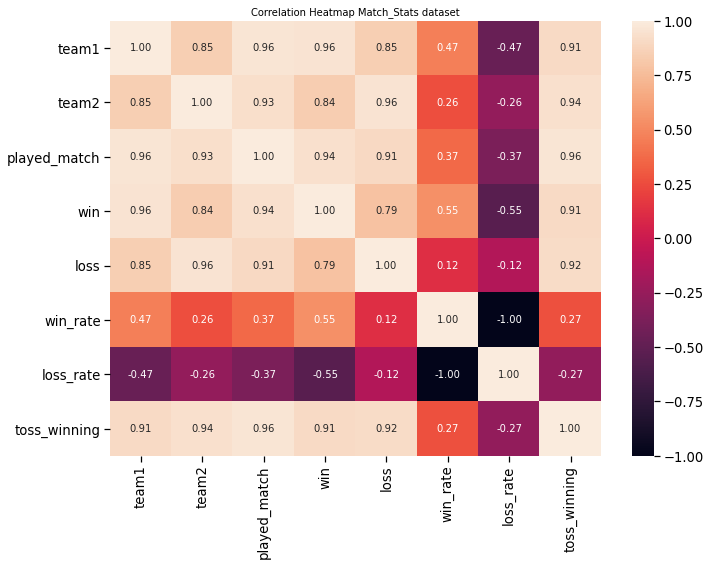

In [59]:
plt.rcParams["figure.figsize"]=[11,8]
sns.heatmap(team1.corr('spearman'), annot=True, fmt=".2f")
plt.title("Correlation Heatmap Match_Stats dataset")

# Regressione lineare

#density=Truedensity=True## Win by match

Text(0.5, 1.0, 'Win by Match')

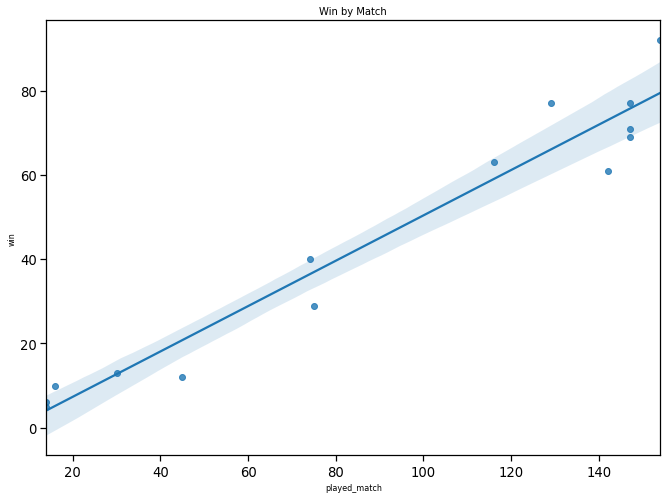

In [60]:
sns.regplot(x = 'played_match', y = 'win', fit_reg = True, data=team1)
plt.title("Win by Match")

### Tasso di vittoria in base al toss winning

Text(0.5, 1.0, 'Win by Toss Winning')

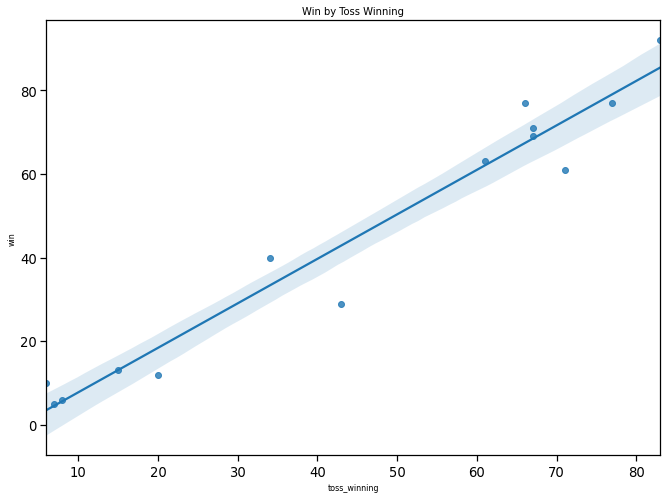

In [61]:
sns.regplot(x = 'toss_winning', y = 'win', fit_reg = True, data=team1)
plt.title("Win by Toss Winning")

# Pairplot del subset di partite

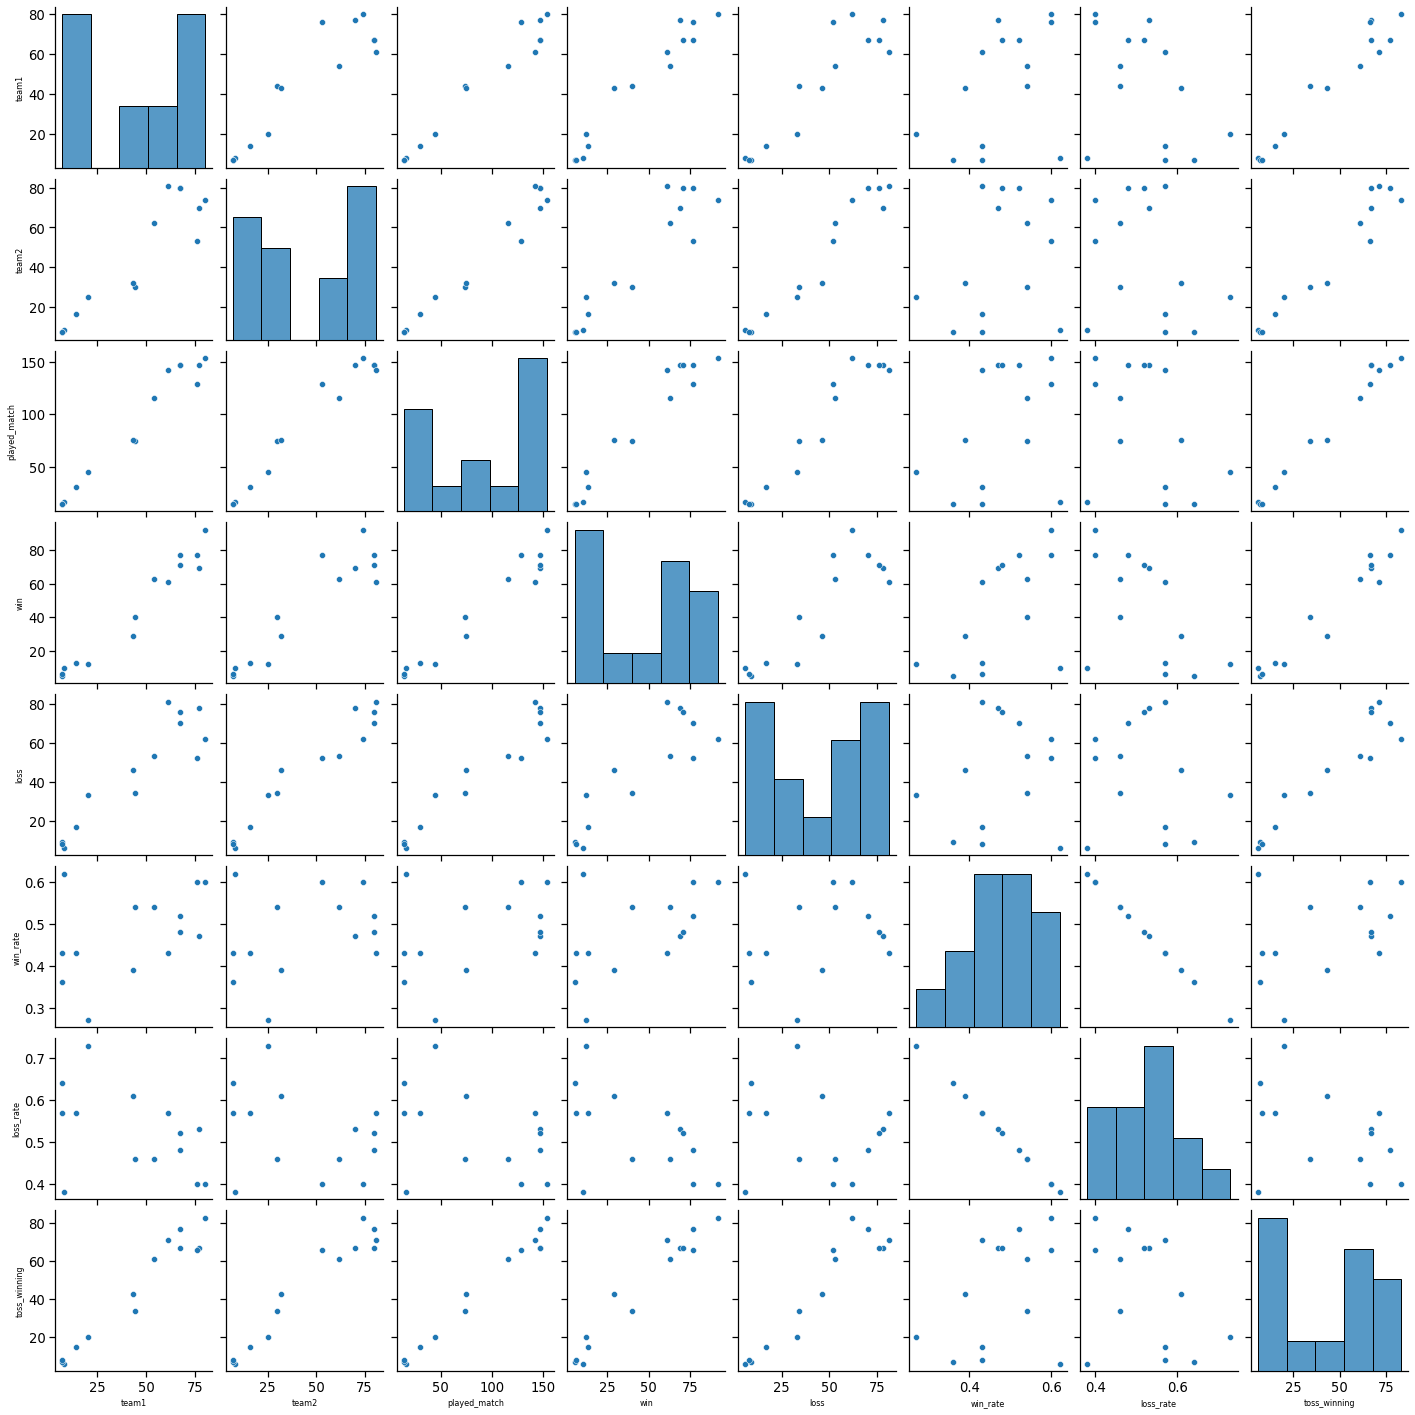

In [62]:
p = sns.pairplot(team1)
#p.fig.suptitle("Pairplot Match_Stats dataset")

plt.show()

# Boxplot

Text(0.5, 1.0, 'Boxplot Ball played in each inning')

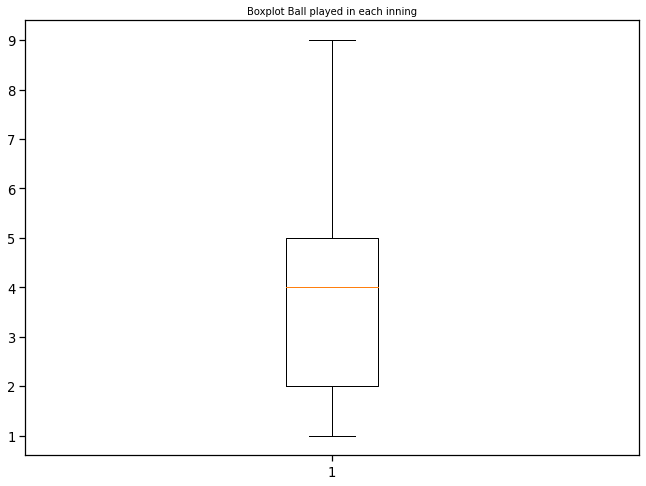

In [63]:
plt.boxplot(ball.ball)
plt.title("Boxplot Ball played in each inning")

Text(0.5, 1.0, 'Boxplot Total Runs by Match')

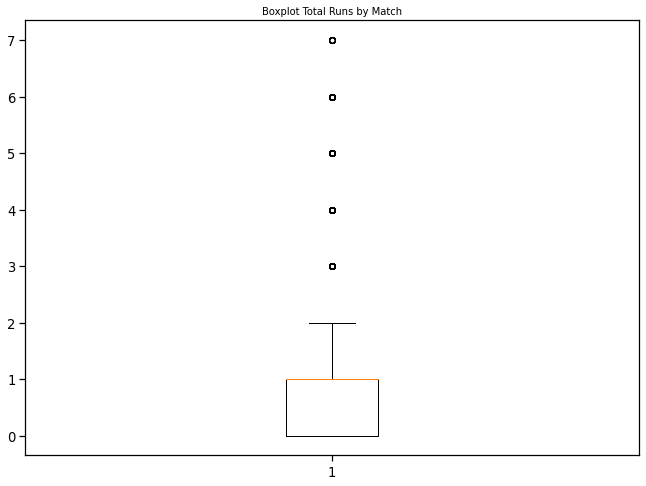

In [64]:
plt.boxplot(ball.total_runs)
plt.title("Boxplot Total Runs by Match")

Text(0.5, 1.0, 'Boxplot Won Matches')

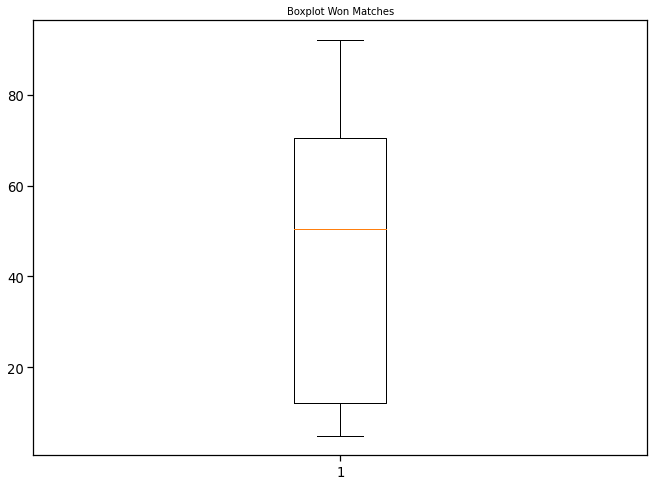

In [65]:
plt.boxplot(team1.win)
plt.title("Boxplot Won Matches")

Text(0.5, 1.0, 'Boxplot Win Rate')

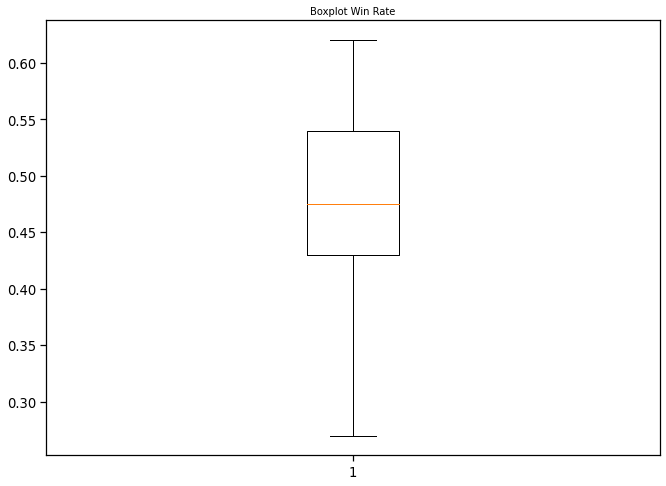

In [66]:
plt.boxplot(team1.win_rate)
plt.title("Boxplot Win Rate")

Text(0.5, 1.0, 'Boxplot Toss Winning')

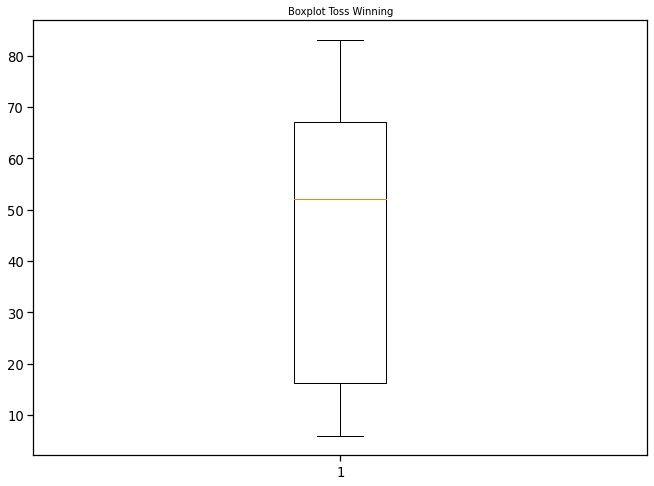

In [67]:
plt.boxplot(team1.toss_winning)
plt.title("Boxplot Toss Winning")

Text(0, 0.5, 'Counts')

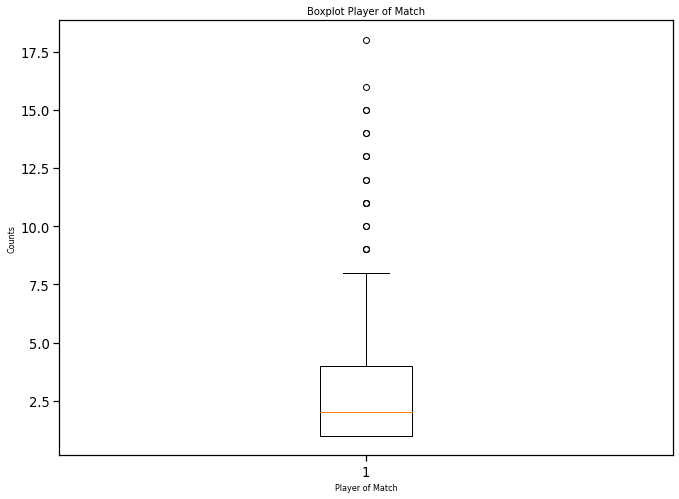

In [68]:
plt.boxplot(match.player_of_match.value_counts())
plt.title("Boxplot Player of Match")
plt.xlabel('Player of Match')
plt.ylabel('Counts')

Text(0, 0.5, 'Counts')

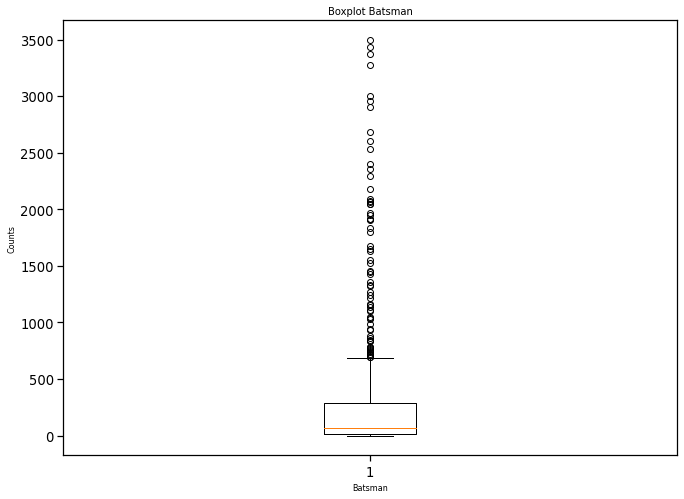

In [69]:
plt.boxplot(ball.batsman.value_counts())
plt.title("Boxplot Batsman")
plt.xlabel('Batsman')
plt.ylabel('Counts')

### Rimozione degli outliers in player of match e batsman e ricalcolo degli indici sintetici

#### Player of Match

In [70]:
Q1 = match['player_of_match'].value_counts().quantile(0.25, interpolation = 'linear')
Q1

1.0

In [71]:
Q3 = match['player_of_match'].value_counts().quantile(0.75, interpolation = 'linear')
Q3

4.0

In [72]:
IQR = Q3 - Q1
IQR

3.0

In [73]:
LowerFence = Q1 - 1.5*IQR
UpperFence = Q3 + 1.5*IQR

print(LowerFence)
print(UpperFence)

-3.5
8.5


In [74]:
df = match['player_of_match'].value_counts().to_frame()
df

,player_of_match
CH Gayle,18
YK Pathan,16
AB de Villiers,15
DA Warner,15
SK Raina,14
...,...
HH Gibbs,1
Mustafizur Rahman,1
WPUJC Vaas,1
S Nadeem,1


In [75]:
OUTLIERS = df.loc[(df['player_of_match'] < LowerFence) | (df['player_of_match'] > UpperFence)]
OUTLIERS


,player_of_match
CH Gayle,18
YK Pathan,16
AB de Villiers,15
DA Warner,15
SK Raina,14
RG Sharma,14
G Gambhir,13
MS Dhoni,13
AM Rahane,12
MEK Hussey,12


In [76]:
NORMAL = df.loc[(df['player_of_match'] > LowerFence) & (df['player_of_match'] < UpperFence)]
NORMAL

,player_of_match
SR Tendulkar,8
AC Gilchrist,7
RV Uthappa,7
AT Rayudu,7
UT Yadav,6
...,...
HH Gibbs,1
Mustafizur Rahman,1
WPUJC Vaas,1
S Nadeem,1


In [77]:
NORMAL.describe()

,player_of_match
count,183.000000
mean,2.202186
std,1.599312
min,1.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,8.000000


<AxesSubplot:label='1eb33fd1-b12b-44e1-836d-ebb7da7fe6cc'>

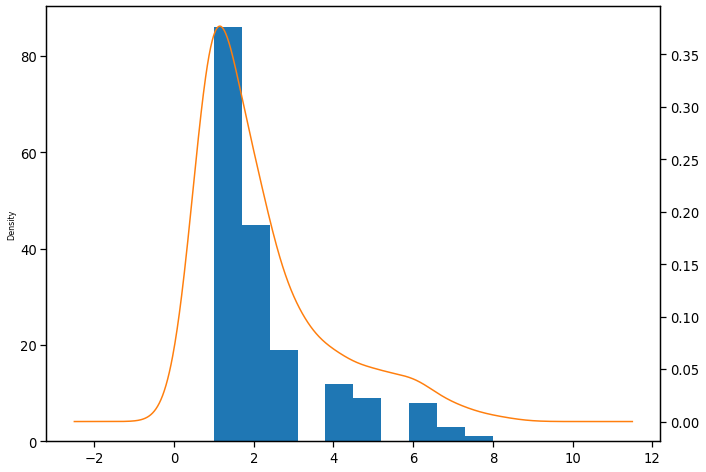

In [78]:
ax = NORMAL["player_of_match"].plot(kind = "hist")
NORMAL["player_of_match"].plot(kind = "kde", ax = ax, secondary_y=True)

Text(0, 0.5, 'Counts')

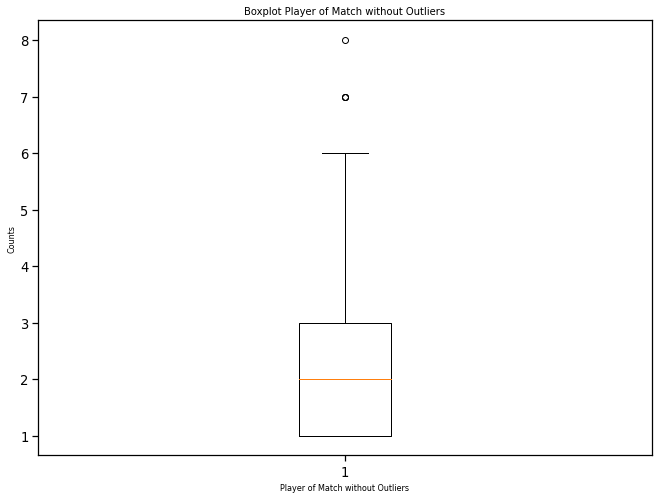

In [79]:
plt.boxplot(NORMAL.player_of_match)
plt.title("Boxplot Player of Match without Outliers")
plt.xlabel("Player of Match without Outliers")
plt.ylabel('Counts')

#### Batsman

In [80]:
Q1 = ball['batsman'].value_counts().quantile(0.25, interpolation = 'linear')
Q1

18.0

In [81]:
Q3 = ball['batsman'].value_counts().quantile(0.75, interpolation = 'linear')
Q3

285.0

In [82]:
IQR = Q3 - Q1

In [83]:
LowerFence = Q1 - 1.5*IQR
UpperFence = Q3 + 1.5*IQR

print(LowerFence)
print(UpperFence)

-382.5
685.5


In [84]:
df = ball['batsman'].value_counts().to_frame()
df

,batsman
V Kohli,3494
G Gambhir,3433
SK Raina,3369
RG Sharma,3274
S Dhawan,3005
...,...
NJ Rimmington,1
YA Abdulla,1
DP Vijaykumar,1
V Pratap Singh,1


In [85]:
OUTLIERS = df.loc[(df['batsman'] < LowerFence) | (df['batsman'] > UpperFence)]
OUTLIERS

,batsman
V Kohli,3494
G Gambhir,3433
SK Raina,3369
RG Sharma,3274
S Dhawan,3005
...,...
MS Bisla,737
EJG Morgan,725
JA Morkel,712
MA Agarwal,692


In [86]:
NORMAL = df.loc[(df['batsman'] > LowerFence) & (df['batsman'] < UpperFence)]
NORMAL

,batsman
KM Jadhav,684
SS Iyer,655
STR Binny,619
AD Mathews,599
KL Rahul,592
...,...
NJ Rimmington,1
YA Abdulla,1
DP Vijaykumar,1
V Pratap Singh,1


In [87]:
NORMAL.describe()

,batsman
count,394.000000
mean,109.619289
std,141.483587
min,1.000000
25%,13.250000
50%,46.500000
75%,143.000000
max,684.000000


<AxesSubplot:label='a5b59d2a-9bda-43e7-b114-cb7b8a8a9cc1'>

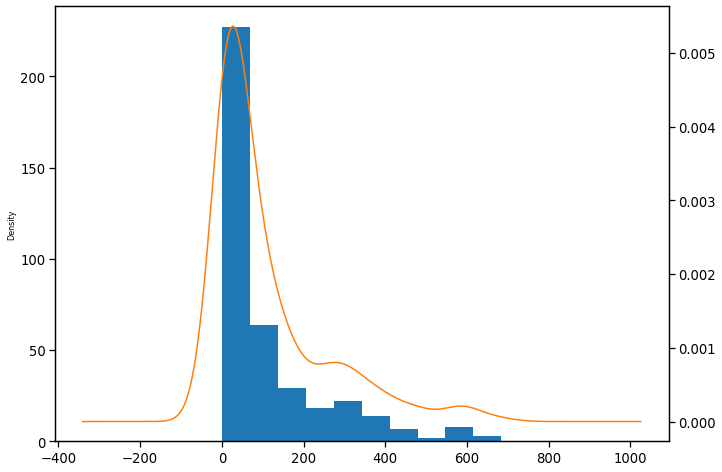

In [88]:
ax = NORMAL["batsman"].plot(kind = "hist")
NORMAL["batsman"].plot(kind = "kde", ax = ax, secondary_y=True)

Text(0, 0.5, 'Counts')

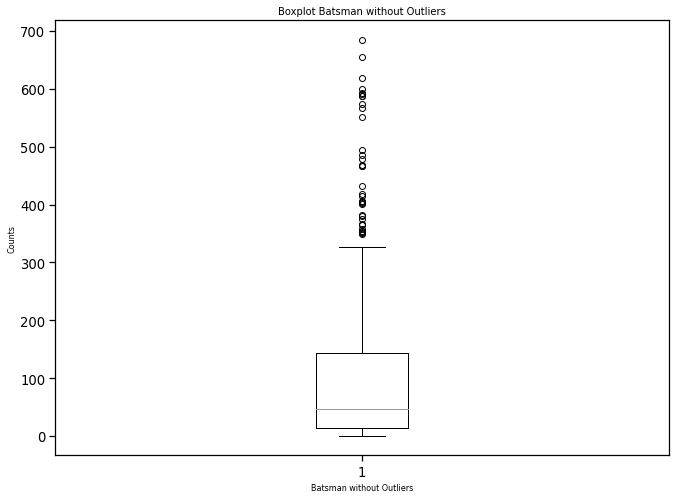

In [89]:
plt.boxplot(NORMAL.batsman)
plt.title("Boxplot Batsman without Outliers")
plt.xlabel("Batsman without Outliers")
plt.ylabel('Counts')